In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
data = pd.read_json("../dataset/preprocessed_data_full.json")

In [22]:
data['broadcaster'].value_counts()

broadcaster
ESPN    397
FOX     291
CBS     263
ABC     166
NBC      99
Name: count, dtype: int64

In [23]:
data.dtypes

game_id          object
teams            object
transcript       object
year              int64
tokens           object
doc_embedding    object
broadcaster      object
dtype: object

In [24]:
data.shape

(1216, 7)

We see the correct number of rows - 1,455 games in the data.

In [25]:
data.count()

game_id          1216
teams            1216
transcript       1216
year             1216
tokens           1216
doc_embedding    1216
broadcaster      1216
dtype: int64

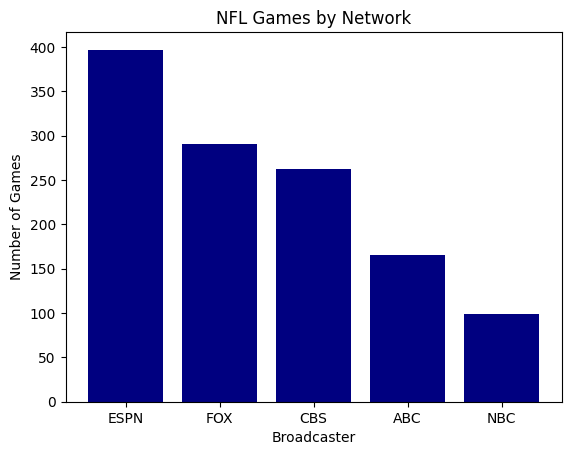

In [ ]:
plt.bar(data['broadcaster'].value_counts().index, data['broadcaster'].value_counts().values,
        color='navy')
plt.ylabel('Number of Games')
plt.xlabel('Broadcaster')
plt.title('NFL Games by Network')
plt.show()


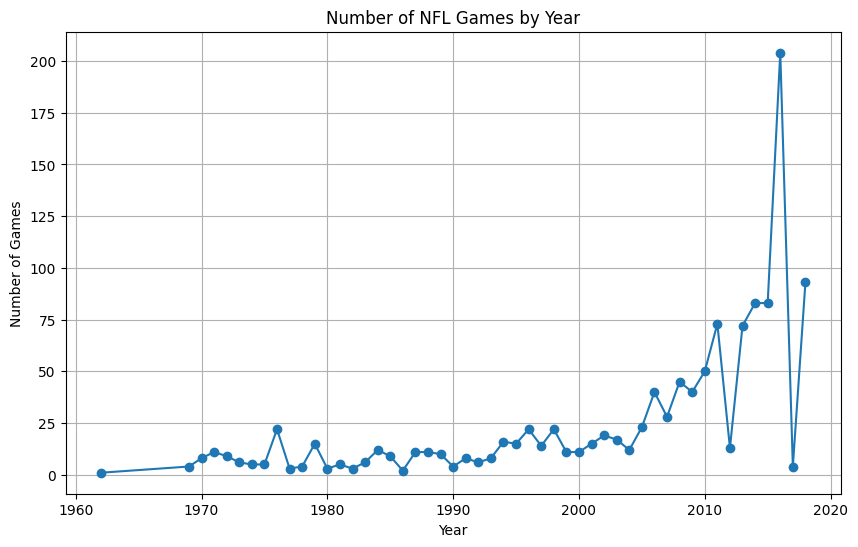

In [33]:
# Games per year
plt.figure(figsize=(10, 6))
data['year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of NFL Games by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

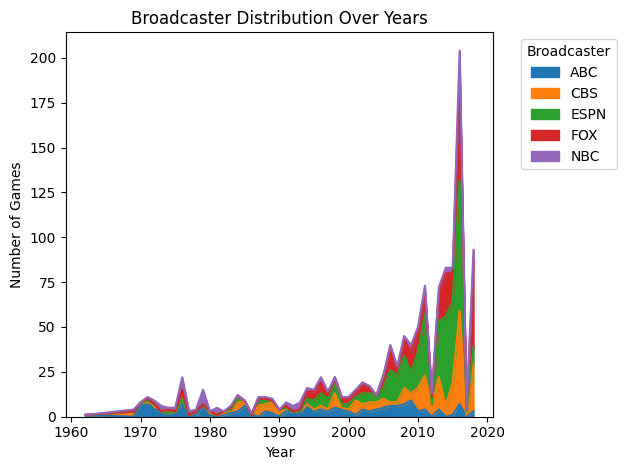

In [35]:
# Create a pivot table of broadcaster vs year
broadcaster_by_year = pd.crosstab(data['year'], data['broadcaster'])
broadcaster_by_year.plot(kind='area', stacked=True)
plt.title('Broadcaster Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.legend(title='Broadcaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

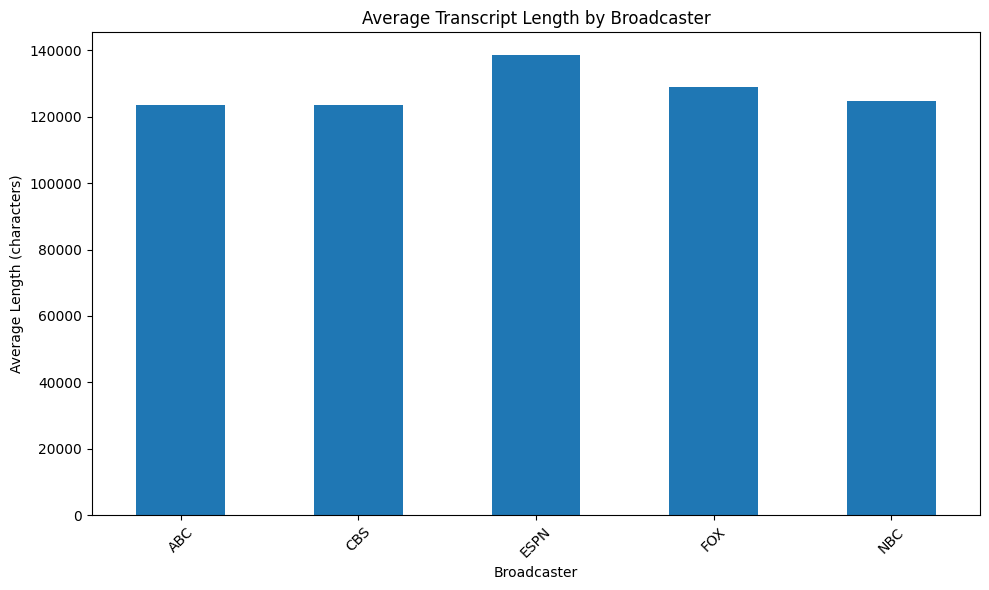

In [36]:
# Average transcript length by broadcaster
data['transcript_length'] = data['transcript'].str.len()
plt.figure(figsize=(10, 6))
data.groupby('broadcaster')['transcript_length'].mean().plot(kind='bar')
plt.title('Average Transcript Length by Broadcaster')
plt.xlabel('Broadcaster')
plt.ylabel('Average Length (characters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

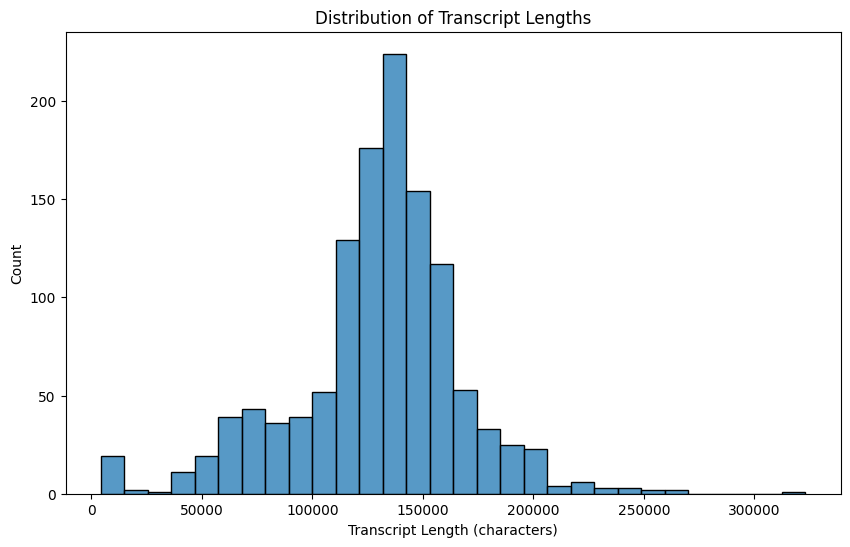

In [38]:
# Distribution of transcript lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='transcript_length', bins=30)
plt.title('Distribution of Transcript Lengths')
plt.xlabel('Transcript Length (characters)')
plt.ylabel('Count')
plt.show()

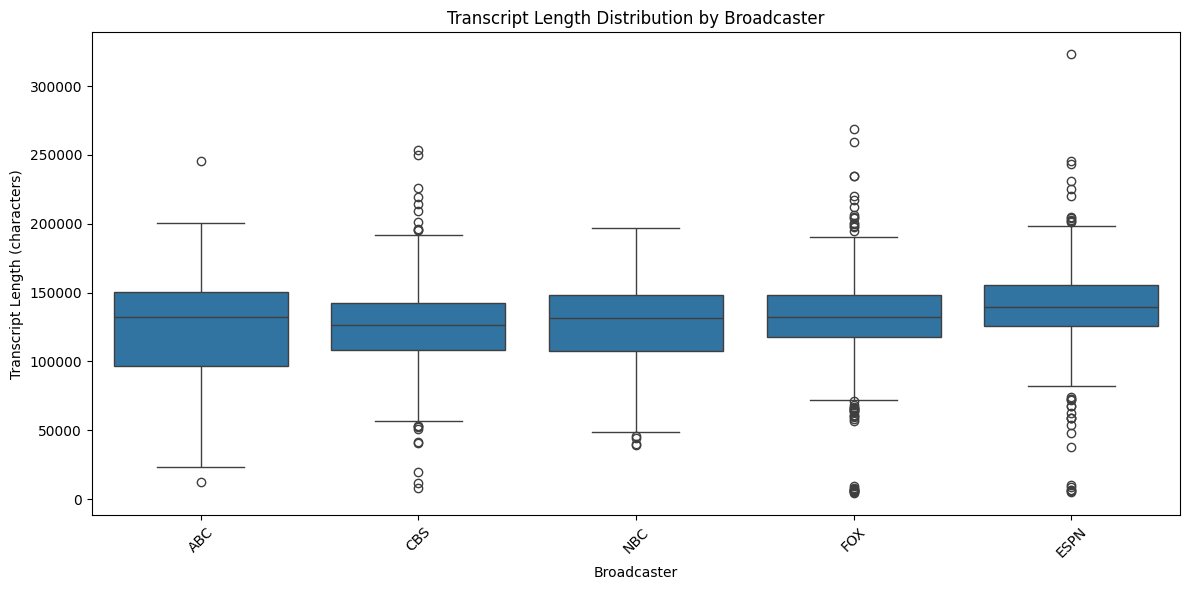

In [39]:
# Transcript length distribution by broadcaster
plt.figure(figsize=(12, 6))
sns.boxplot(x='broadcaster', y='transcript_length', data=data)
plt.title('Transcript Length Distribution by Broadcaster')
plt.xlabel('Broadcaster')
plt.ylabel('Transcript Length (characters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# !pip install textblob --- needed this

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 15.5 MB/s eta 0:00:00
